###1.From the '360 rocks' folder create a training dataset that has 30 categories and 12 images in each category. To create the categories, group the rocks by name: e.g., one category will be 12 Andesite rocks, another category will be 12 Basalt rocks, etc.  From  '120 rocks' folder create a validation dataset that has 30 categories and 4 images in each category. [10 points]

In [ ]:
import os
import shutil
import random


rock_folder = "Rocks/"


rock_names = []


for filename in os.listdir(rock_folder):
    if filename.endswith(".jpg"):

        rock_name = filename.split("_")[1]
        if rock_name not in rock_names:
            rock_names.append(rock_name)


categories = random.sample(rock_names, 30)

# Create a new folder to store the training dataset
output_folder = "training_set/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Copy images to the training dataset folder based on categories
for category in categories:
    category_folder = os.path.join(output_folder, category)
    if not os.path.exists(category_folder):
        os.makedirs(category_folder)

    # Filter images with the selected category
    category_images = [filename for filename in os.listdir(rock_folder) if filename.split("_")[1] == category]

    # Randomly select 12 images
    selected_images = random.sample(category_images, 12)

    # Copy selected images to the category folder
    for image in selected_images:
        shutil.copyfile(os.path.join(rock_folder, image), os.path.join(category_folder, image))


In [ ]:
import os
import shutil
import random

# Path to the folder containing the rock images
rock_folder = "Rocks120/"

# Create a list to store unique rock names
rock_names = []

# Iterate over all files in the folder
for filename in os.listdir(rock_folder):
    if filename.endswith(".jpg"):
        # Extract the rock name between the first two underscores
        rock_name = filename.split("_")[1]
        if rock_name not in rock_names:
            rock_names.append(rock_name)

# Create 30 categories with 4 images in each category
categories = random.sample(rock_names, 30)

# Create a new folder to store the validation dataset
output_folder = "validation_set/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Copy images to the validation dataset folder based on categories
for category in categories:
    category_folder = os.path.join(output_folder, category)
    if not os.path.exists(category_folder):
        os.makedirs(category_folder)

    # Filter images with the selected category
    category_images = [filename for filename in os.listdir(rock_folder) if filename.split("_")[1] == category]

    # Randomly select 4 images
    selected_images = random.sample(category_images, 4)

    # Copy selected images to the category folder
    for image in selected_images:
        shutil.copyfile(os.path.join(rock_folder, image), os.path.join(category_folder, image))


###2.Build the input pipeline, including the appropriate preprocessing operations, and add data augmentation.

In [ ]:
import tensorflow as tf

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 30
NUM_TRAIN_IMAGES = 30 * 12
NUM_VAL_IMAGES = 30 * 4

# Define the path to the training and validation datasets
train_dataset_path = "training_set/"
val_dataset_path = "validation_set/"

# Data augmentation operations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Generate batches of augmented data for validation
val_generator = val_datagen.flow_from_directory(
    val_dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=NUM_TRAIN_IMAGES // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=NUM_VAL_IMAGES // BATCH_SIZE
)


Found 360 images belonging to 30 classes.
Found 120 images belonging to 30 classes.
Epoch 1/10
11/11 [==============================] - 14s 590ms/step - loss: 3.5088 - accuracy: 0.0213 - val_loss: 3.3974 - val_accuracy: 0.0521
Epoch 2/10
11/11 [==============================] - 8s 786ms/step - loss: 3.4008 - accuracy: 0.0640 - val_loss: 3.3931 - val_accuracy: 0.0417
Epoch 3/10
11/11 [==============================] - 7s 607ms/step - loss: 3.3904 - accuracy: 0.0369 - val_loss: 3.3366 - val_accuracy: 0.0312
Epoch 4/10
11/11 [==============================] - 8s 700ms/step - loss: 3.3218 - accuracy: 0.0427 - val_loss: 3.3003 - val_accuracy: 0.0312
Epoch 5/10
11/11 [==============================] - 6s 554ms/step - loss: 3.2978 - accuracy: 0.0762 - val_loss: 3.2787 - val_accuracy: 0.0729
Epoch 6/10
11/11 [==============================] - 7s 693ms/step - loss: 3.3017 - accuracy: 0.0549 - val_loss: 3.5111 - val_accuracy: 0.0417
Epoch 7/10
11/11 [==============================] - 7s 673ms/st

###3.Fine-tune a pretrained neural network of your choice on the training data from the previous step. Before fine-tuning, you should remove the top layer of the pretrained network and add at least two more layers with a softmax activation function (your output layer should have 30 neurons and the layer before the output layer should have 8 neurons). For fine-tuning, you should first train for a few epochs only weights in the layers that you added [5 points], and after that, you should train all the weights [5 points] (you should try to run your code until convergence, but for at least 20 epochs). Display train and validation loss and accuracy during the training and make a plot showing train and validation loss and accuracy as a function of the training epoch (mark the epoch where you switched to training the whole network with a vertical line) [5 points]. We will award the best performers with extra points. Discuss your findings - comment on the performance of the network [1 point], convergence [1 point], and possible hyperparameter tweaks you tried, or you would try to improve the performance [3 points].   

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# Load the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add new layers
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='elu'))
model.add(layers.Dense(30, activation='softmax'))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_generator, epochs=5, validation_data=val_generator)


base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_finetune = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/5
12/12 [==============================] - 9s 696ms/step - loss: 3.6056 - accuracy: 0.0444 - val_loss: 3.4699 - val_accuracy: 0.0500
Epoch 2/5
12/12 [==============================] - 7s 578ms/step - loss: 3.4603 - accuracy: 0.0389 - val_loss: 3.4141 - val_accuracy: 0.0583
Epoch 3/5
12/12 [==============================] - 8s 598ms/step - loss: 3.4227 - accuracy: 0.0500 - val_loss: 3.3836 - val_accuracy: 0.0500
Epoch 4/5
12/12 [==============================] - 8s 656ms/step - loss: 3.4124 - accuracy: 0.0500 - val_loss: 3.4196 - val_accuracy: 0.0583
Epoch 5/5
12/12 [==============================] - 7s 605ms/step - loss: 3.3318 - accuracy: 0.0806 - val_loss: 3.4265 - val_accuracy: 0.0417
Epoch 1/20
12/12 [==============================] - 10s 639ms/step - loss: 3.2544 - accuracy: 0.0917 - val_loss: 3.3521 - val_accuracy: 0.0833
Epoch 2/20
12/12 [==============================] - 8s 697ms/step - loss: 3.2041 - accuracy: 0.1167 - val_loss: 3.2994 - val_accuracy: 0.0750
Epoch 3/20

###Graph

In [ ]:


epochs_initial = len(history.history['loss'])
total_epochs = epochs_initial + len(history_finetune.history['loss'])

loss = history.history['loss'] + history_finetune.history['loss']
acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']
epochs = range(1, total_epochs + 1)

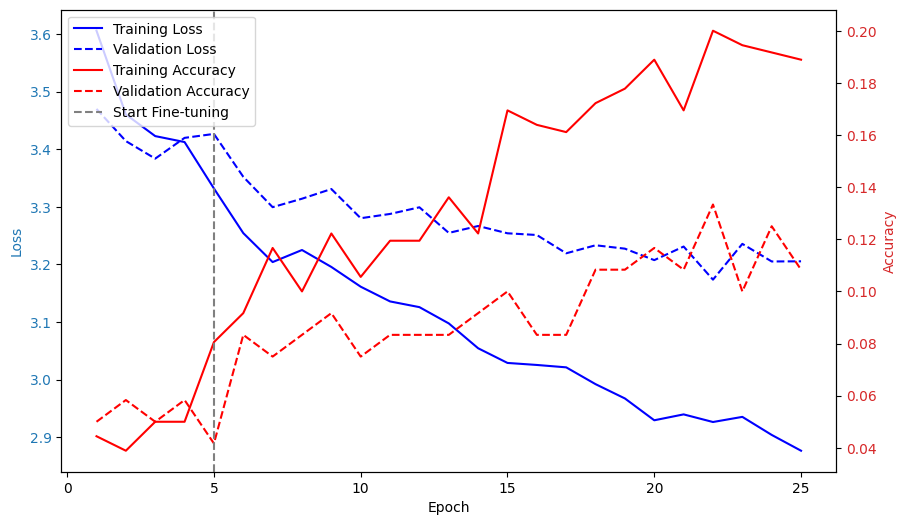

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(epochs, loss, 'b-', label='Training Loss')
ax1.plot(epochs, val_loss, 'b--', label='Validation Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Accuracy', color='tab:red')
ax2.plot(epochs, acc, 'r-', label='Training Accuracy')
ax2.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.axvline(x=epochs_initial, color='gray', linestyle='--', label='Start Fine-tuning')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')



### Discuss your findings - comment on the performance of the network, convergence


1. **Overall Performance:**
The training accuracy is relatively low, starting at 4.44% and ending at 18.89% after 25 epochs (5 initial epochs + 20 additional epochs). The validation accuracy also remains quite low, although it does see a slight increase from 4.17% to 13.33% over the same period.
This suggests the task is challenging, or the network has not yet optimized its parameters to the fullest extent for the given problem. The low accuracy indicates that the model is still in the early stages of learning and hasn't achieved strong predictive performance.
2. **Convergence:**
There is a general trend of decreasing loss for both training and validation, indicating that the network is learning and improving its predictions over time. The training loss drops from 3.6056 to 2.8767, and the validation loss sees a slight reduction overall, though with some fluctuation.
The model's weights are adjusting to patterns in the training data that may not generalize well to the validation data.

###Possible hyperparameter tweaks you tried, or you would try to improve the performance



*   Activation Function : Initialy for the last but one layer with 8 neurons we used ReLu activation function. Since ReLu caps data lesser than 0 it lead to dying ReLu problem and hence the activation.txt generated had only zeros. The validation acccuracy was also low at 3.33% while training the model. On changing it's activation function to ELU improved the validation accuracy to 18% and mitigated the dying ReLu problem.
*   Epochs : Changed the e[ochs for training the last two layers to 10 and training of entire model to 40 which reduced the validation accuracy back to 3.33% which could be due to overfitting or increase in model complexity. Hence, changed the epoch values back to 5 and 20 for training1 and training2 respectively.



1. Learning Rate Adjustments

Adjusting the learning rate can have a significant impact on model training. A too high learning rate can cause the model to converge too quickly to a suboptimal solution, and a too low learning rate might result in slow convergence or no convergence at all.
Learning rate scheduling: Implementing a learning rate schedule that decreases the learning rate gradually as the training progresses can help the model to fine-tune the adjustments to the weights of the network.
2. Optimizer Tweaks

Changing optimizers: Different optimizers may perform differently depending on the nature of the data and the model architecture. While Adam is generally robust, trying optimizers like SGD with momentum, or RMSprop could provide different benefits.
Tuning optimizer parameters such as momentum or the decay rate can also affect performance.
3. Model Architecture Changes

Increasing model complexity: If the model is too simple, it may not capture the necessary patterns in the data. Adding more layers, increasing the number of neurons in existing layers, or changing the types of layers (e.g., adding dropout layers or batch normalization layers) might help.
Reducing model complexity: Conversely, if the model is too complex, it might be overfitting to the training data (though this doesn't seem to be your issue given the low accuracy). Simplifying the model could be another route to explore.
4. Data Augmentation

Enhancing data augmentation: Incorporating more forms of data augmentation can provide the model with a more diverse set of training examples, which can improve its ability to generalize. Consider adding or adjusting existing parameters like rotation range, zoom range, shear intensity, and horizontal flipping.

5. Regularization Techniques

Implementing dropout: Adding dropout layers can help prevent overfitting by randomly dropping units (along with their connections) during the training process.
L2 regularization: Adding L2 penalties on the layer weights can constrain the weights during optimization, providing another form of regularization.
6. Early Stopping and Checkpoints

Early stopping: Monitor the validation loss and stop training when it starts to increase, indicating potential overfitting.
Model checkpoints: Save the model or its weights at intervals or when it achieves a performance threshold, allowing you to revert to the best state if needed.


###4. Compute the correlation coefficients between the network data and human data for each of the 8 neurons in your next-to-last layer (similar to HW3, using procrustes analysis) for the images from the train set (360 images) and (separately) for the images from the validation set (120 images). Report each of the 8 correlation coefficients and your average correlation coefficients (please mark in the bold with large font so we can easily find it).

In [ ]:
from tensorflow.keras.models import Model
import numpy as np



# Create an intermediate model to get the output of the second-to-last dense layer
# The second-to-last layer can be accessed with model.layers[-2]
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)


train_activations = intermediate_layer_model.predict(train_generator)

# For the validation set
val_activations = intermediate_layer_model.predict(val_generator)

# Save the activations to a txt file if needed
np.savetxt('train_activations.txt', train_activations)
np.savetxt('val_activations.txt', val_activations)



4/4 [==============================] - 1s 235ms/step


In [ ]:

import numpy as np
from scipy.stats import pearsonr


# Load the human data from MDS files
human_data_train =np.loadtxt('/content/mds_360.txt')
human_data_val = np.loadtxt('/content/mds_120.txt')

# Load the network activations (replace with actual activations)
network_data_train = np.loadtxt('/content/train_activations.txt')
network_data_val = np.loadtxt('/content/val_activations.txt')

# Compute correlation coefficients for training data
train_correlations = [pearsonr(human_data_train[:, i], network_data_train[:, i])[0] for i in range(8)]
average_train_correlation = np.mean(train_correlations)

# Compute correlation coefficients for validation data
val_correlations = [pearsonr(human_data_val[:, i], network_data_val[:, i])[0] for i in range(8)]
average_val_correlation = np.mean(val_correlations)

# Print each correlation coefficient and the averages
print("Training data correlation coefficients:")
for i, corr in enumerate(train_correlations, 1):
    print(f"Neuron {i}: {corr:.3f}")

print("\nValidation data correlation coefficients:")
for i, corr in enumerate(val_correlations, 1):
    print(f"Neuron {i}: {corr:.3f}")

print("\nAverage correlation coefficient for training data: \033[1m\033[94m{:.3f}\033[0m".format(average_train_correlation))
print("Average correlation coefficient for validation data: \033[1m\033[94m{:.3f}\033[0m".format(average_val_correlation))

Training data correlation coefficients:
Neuron 1: 0.027
Neuron 2: 0.099
Neuron 3: -0.000
Neuron 4: 0.108
Neuron 5: -0.043
Neuron 6: 0.058
Neuron 7: -0.009
Neuron 8: 0.076

Validation data correlation coefficients:
Neuron 1: 0.014
Neuron 2: 0.056
Neuron 3: 0.087
Neuron 4: -0.016
Neuron 5: -0.078
Neuron 6: -0.104
Neuron 7: 0.071
Neuron 8: -0.061

Average correlation coefficient for training data: 0.039
Average correlation coefficient for validation data: -0.004


The training data shows positive correlation between human prediction and network prediction. The validation data shows negative correlation closer to zero . Could be almost no correlation btween the predictions. (could be overfitting).

### References :
* Lecture slides
* OpenAI's ChatGPT model was employed for certain conversational AI tasks